# Data Preparation


In [25]:
# untuk menginstalasi dependency
#!pip install Sastrawi
#!pip install swifter

In [4]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_excel("cyberbullying.xlsx") # import dataset
df.head()

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Akun IG Artis,Unnamed: 6,Unnamed: 7
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN


In [15]:
to_drop = ['No.', 'Nama Instagram', 'Tanggal Posting', 'Akun IG Artis', 'Unnamed: 6', 'Unnamed: 7']
df.drop(to_drop, inplace=True, axis=1)

df.head()

,Komentar,Kategori
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying
1,"""makan nasi padang aja begini badannya""",Non-bullying
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying


In [36]:
#Check for NaN Value
check_nan = df.isnull().values.any()
 
print(check_nan)

False


In [37]:
# mencari nilai duplikat dari kolom
df.duplicated(['Komentar'])

0      False
1      False
2      False
3      False
4      False
       ...  
645    False
646    False
647    False
648    False
649    False
Length: 650, dtype: bool

In [38]:
df.describe(include=['object'])

,Komentar,Kategori
count,650,650
unique,650,2
top,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying
freq,1,325


In [39]:
total = df.groupby(['Kategori']).count()
print("Total komentar untuk setiap kategori")
total

Total komentar untuk setiap kategori


,Komentar
Kategori,
Bullying,325
Non-bullying,325


In [16]:
# variabel untuk kolom Komentar
comments = df.Komentar
print(comments.head())

0          "Kaka tidur yaa, udah pagi, gaboleh capek2"
1              "makan nasi padang aja begini badannya"
2    "yang aku suka dari dia adalah selalu cukur je...
3    "Hai kak Isyana aku ngefans banget sama kak Is...
4    "Manusia apa bidadari sih herann deh cantik te...
Name: Komentar, dtype: object


In [17]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
df['Komentar'] = df['Komentar'].str.lower()


print('Case Folding Result : \n')
print(df['Komentar'].head(5))

Case Folding Result : 

0          "kaka tidur yaa, udah pagi, gaboleh capek2"
1              "makan nasi padang aja begini badannya"
2    "yang aku suka dari dia adalah selalu cukur je...
3    "hai kak isyana aku ngefans banget sama kak is...
4    "manusia apa bidadari sih herann deh cantik te...
Name: Komentar, dtype: object


In [19]:
import string 
import re #regex library

def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['Komentar'] = df['Komentar'].apply(remove_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['Komentar'] = df['Komentar'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Komentar'] = df['Komentar'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Komentar'] = df['Komentar'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Komentar'] = df['Komentar'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Komentar'] = df['Komentar'].apply(remove_singl_char)

#Remove repeating char
def remove_repeating_char(text):
      return re.sub(r'(\w)\1+\b', r'\1',text)
 
df['Komentar'] = df['Komentar'].apply(remove_repeating_char)

#Remove repeating word
def remove_repeating_word(text):
      return re.sub(r'\b(\w+)(\1)+\b', r'\1',text)
 
df['Komentar'] = df['Komentar'].apply(remove_repeating_word)

print(df['Komentar'].head(5))

0                  ka tidur ya udah pagi gaboleh capek
1                makan nasi padang aja begini badannya
2    yang aku suka dari dia adalah selalu cukur jem...
3    hai kak isyana aku ngefans banget sama kak isy...
4      manusia apa bidadari sih heran deh cantik terus
Name: Komentar, dtype: object


In [20]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize

# NLTK word rokenize 

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['Komentar_tokens'] = df['Komentar'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['Komentar_tokens'].head())

Tokenizing Result : 

0          [ka, tidur, ya, udah, pagi, gaboleh, capek]
1         [makan, nasi, padang, aja, begini, badannya]
2    [yang, aku, suka, dari, dia, adalah, selalu, c...
3    [hai, kak, isyana, aku, ngefans, banget, sama,...
4    [manusia, apa, bidadari, sih, heran, deh, cant...
Name: Komentar_tokens, dtype: object


In [21]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwordsID.txt", header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend([x for x in txt_stopword[0]])

#convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Komentar_tokens_WSW'] = df['Komentar_tokens'].apply(stopwords_removal) 


print(df['Komentar_tokens_WSW'].head())

0              [ka, tidur, udah, pagi, gaboleh, capek]
1                 [makan, nasi, padang, aja, badannya]
2                      [suka, cukur, jembut, manggung]
3    [hai, kak, isyana, ngefans, banget, kak, isyan...
4         [manusia, bidadari, sih, heran, deh, cantik]
Name: Komentar_tokens_WSW, dtype: object


In [25]:
normalizad_word = pd.read_excel("kamus_singkatan.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Komentar_normalized'] = df['Komentar_tokens_WSW'] .apply(normalized_term)

df['Komentar_normalized']

0        [kakak, tidur, sudah, pagi, tidak boleh, lelah]
1                  [makan, nasi, padang, saja, badannya]
2                        [suka, cukur, jembut, manggung]
3      [hai, kakak, isyana, ngefans, sekali, kakak, i...
4           [manusia, bidadari, sih, heran, deh, cantik]
                             ...                        
645    [memutuskan, fans, isyana, gila, keren, sekali...
646    [amzing, isyana, jujur, amazed, sekali, skil, ...
647    [ngiri, liat, orang, keren, main, alat, musik,...
648                    [sampai, isyana, sempurna, orang]
649    [ini, main, alat, musik, olahraga, jari, kaki,...
Name: Komentar_normalized, Length: 650, dtype: object

In [28]:

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Komentar_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Komentar_tokens_stemmed'] = df['Komentar_normalized'].swifter.apply(get_stemmed_term)
print(df['Komentar_tokens_stemmed'])

1558
------------------------
kakak : kakak
tidur : tidur
sudah : sudah
pagi : pagi
tidak boleh : tidak boleh
lelah : lelah
makan : makan
nasi : nasi
padang : padang
saja : saja
badannya : badan
suka : suka
cukur : cukur
jembut : jembut
manggung : manggung
hai : hai
isyana : isyana
ngefans : ngefans
sekali : sekali
lagu : lagu
didalam : dalam
jiwa : jiwa
manusia : manusia
bidadari : bidadari
sih : sih
heran : heran
deh : deh
cantik : cantik
kinanti : kinanti
sekarang : sekarang
berubah : ubah
baju : baju
nakal : nakal
gemesnya : gemesnya
mirip : mirip
tango : tango
jelek : jelek
anaknya : anak
ayahnya : ayah
cakap : cakap
tua : tua
begitu : begitu
mukanya : muka
tasya : tasya
muka : muka
anak : anak
kok : kok
ngegemesin : ngegemesin
lucunya : lucu
kolot : kolot
bayi : bayi
lucu : lucu
gila : gila
orang : orang
jomblo : jomblo
psikolog : psikolog
laku : laku
kamu : kamu
sintingnya : sinting
tingkat : tingkat
dewa : dewa
lutfi : lutfi
putus : putus
salsa : salsa
stres : stres
tolol : tol

Pandas Apply:   0%|          | 0/650 [00:00<?, ?it/s]

0        [kakak, tidur, sudah, pagi, tidak boleh, lelah]
1                     [makan, nasi, padang, saja, badan]
2                        [suka, cukur, jembut, manggung]
3      [hai, kakak, isyana, ngefans, sekali, kakak, i...
4           [manusia, bidadari, sih, heran, deh, cantik]
                             ...                        
645    [putus, fans, isyana, gila, keren, sekali, ota...
646    [amzing, isyana, jujur, amazed, sekali, skil, ...
647    [ngiri, liat, orang, keren, main, alat, musik,...
648                    [sampai, isyana, sempurna, orang]
649    [ini, main, alat, musik, olahraga, jari, kaki,...
Name: Komentar_tokens_stemmed, Length: 650, dtype: object


In [29]:
df.to_csv("Text_Preprocessing.csv")

# Data Visualization

In [53]:
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [51]:
# import dataset yang telah dipreprocessing
df = pd.read_csv("Text_Preprocessing.csv")
df[["Komentar", 'Kategori', 'Komentar_tokens_stemmed']].head()

,Komentar,Kategori,Komentar_tokens_stemmed
0,ka tidur ya udah pagi gaboleh capek,Non-bullying,"['kakak', 'tidur', 'sudah', 'pagi', 'tidak bol..."
1,makan nasi padang aja begini badannya,Non-bullying,"['makan', 'nasi', 'padang', 'saja', 'badan']"
2,yang aku suka dari dia adalah selalu cukur jem...,Bullying,"['suka', 'cukur', 'jembut', 'manggung']"
3,hai kak isyana aku ngefans banget sama kak isy...,Non-bullying,"['hai', 'kakak', 'isyana', 'ngefans', 'sekali'..."
4,manusia apa bidadari sih heran deh cantik terus,Non-bullying,"['manusia', 'bidadari', 'sih', 'heran', 'deh',..."


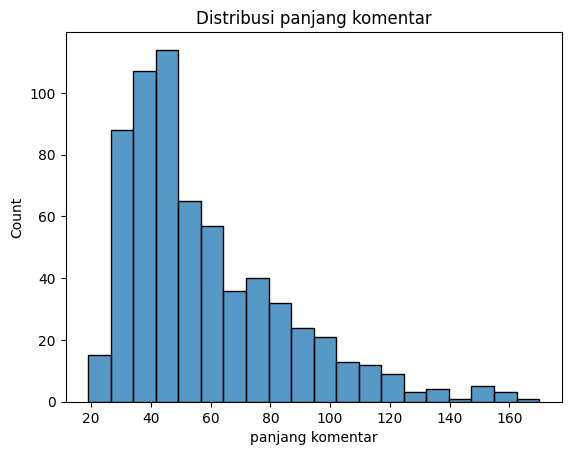

In [57]:
# Melihat statistik distribusi panjang komentar
df["panjang komentar"] = df["Komentar"].apply(len)
sns.histplot(df["panjang komentar"]).set_title("Distribusi panjang komentar")
_ = plt.axis("on")

In [8]:
#menemukan kata yang paling banyak ditemukan pada komentar
words = list(df["Komentar_tokens_stemmed"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(8)

[("'kamu',", 109),
 ("'saja',", 73),
 ("'sudah',", 58),
 ("'kakak',", 56),
 ("'cantik',", 54),
 ("'anjing',", 51),
 ("'mirip',", 49),
 ("'sekali',", 46)]

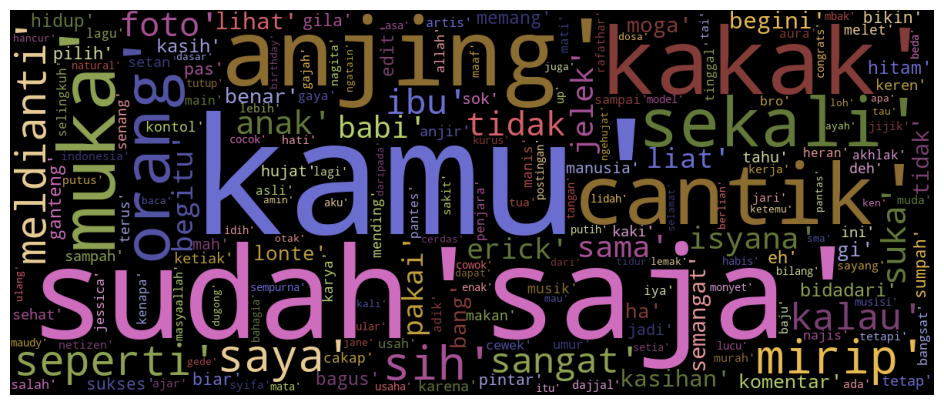

In [55]:
#memvisualisasi kata yang paling banyak muncul pada komentar
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, colormap="tab20b").generate(" ".join(words))

plt.figure(figsize=(15,5))
plt.imshow(wc, interpolation='antialiased')
_ = plt.axis("off")

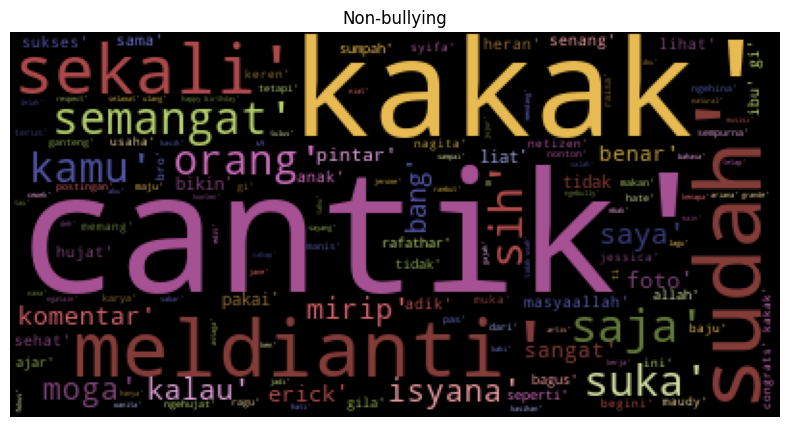

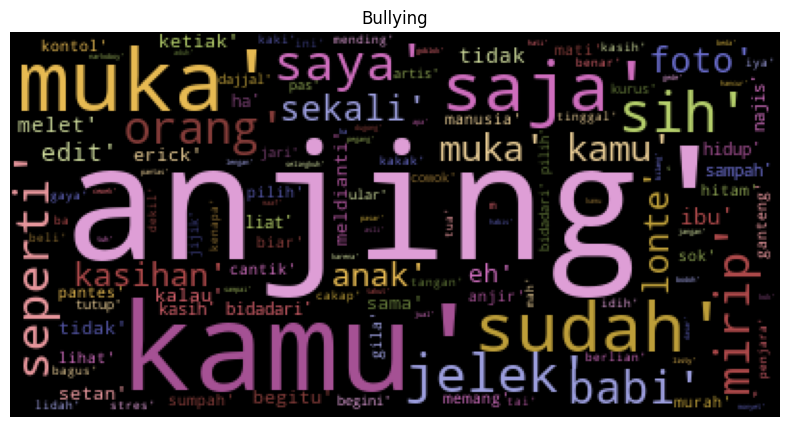

In [58]:
#memvisualiasi kata yang paling banyak muncul pada setiap kategori
for i in df['Kategori'].unique():
    df_4 = df[df['Kategori'] == i]
    wordcloud = WordCloud(relative_scaling=1,normalize_plurals=False, colormap="tab20b").generate(df_4['Komentar_tokens_stemmed'].to_string())
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud, interpolation='antialiased')
    plt.title(i)
    plt.axis("off")